In [298]:
import pandas as pd 
import numpy as np 
import seaborn as sns

[source](https://subdued-reply-78e.notion.site/201-a31f12f087b34bf2863bee4fdcb1e0c6)

# Module A

## Reading input csv

In [299]:
# reading data to csv + info
data = pd.read_csv("heart.csv")
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## mapping


In [300]:
# mapping
# mapping = {1: 'man',
#            0: 'woman'}
# data_n = data
# data_n ['sex'] = data_n['sex'].map(mapping)
# print(data_n['sex'])

# separate 2 columns (should be useless)
# pd.get_dummies(data_n,prefix=['c'], columns=['sex'])

# some hack from stackoverlow maybe will be useful
# data_n = data['some complicated column'].str.split('separator',expand=True)
# data_n.columns = ['col1', 'col2']
# data = data.join(data_n)
# data = data.drop('some complicated column', axis=1) bla bla bla - drop old column

## filling na

In [301]:
# how many na values
print(data.isna().sum())
# dropping na values
data = data.dropna()
# filling na value (look for methods)
data = data.fillna(method='pad')
data = data.fillna(method='backfill')


age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64


## balancing

1    165
0    138
Name: output, dtype: int64


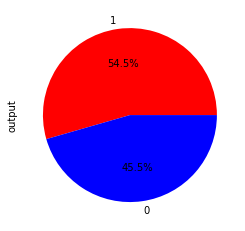

In [302]:
# function for balancing 
def balance_df(frame: pd.DataFrame, col: str, upsample_minority: bool):
    grouped = frame.groupby(col)
    n_samp = {
        True: grouped.size().max(),
        False: grouped.size().min(),
    }[upsample_minority]

    fun = lambda x: x.sample(n_samp, replace=upsample_minority)
    balanced = grouped.apply(fun)
    balanced = balanced.reset_index(drop=True)
    return balanced

# visualization in plot
data.output.value_counts().plot(kind='pie', colors=['red', 'blue'], autopct='%1.1f%%')
# get counts
print(data['output'].value_counts())
# data = balance_df(data, 'output', False)

## making correct types

In [303]:
# changing type of column
print(data['age'].astype('float64'))

0      63.0
1      37.0
2      41.0
3      56.0
4      57.0
       ... 
298    57.0
299    45.0
300    68.0
301    57.0
302    57.0
Name: age, Length: 303, dtype: float64


## visualization

In [304]:

# binary_columns = data.columns['sex', 'exng', 'fbs']
# x_col = data.columns[0:13]
# #
# sns_plot = sns.pairplot(data[['sex', 'exng', 'fbs']])

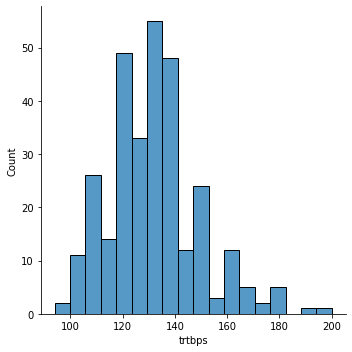

In [305]:
sns.displot(data['trtbps'])

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

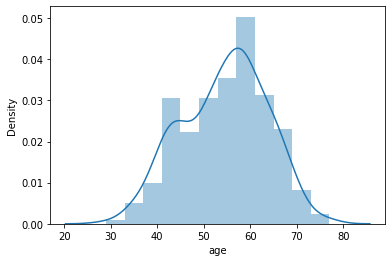

In [306]:
sns.distplot(data['age'])

<AxesSubplot:>

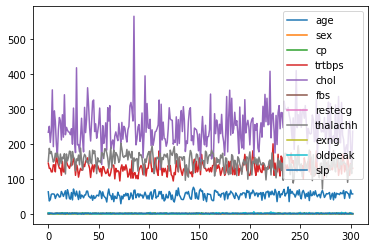

In [307]:
data[x_col].plot()

## saving csv


In [308]:
#saving csv file
data.to_csv('preprocessed_heart.csv', index=False)

# Module B

## Считывание данных и их обработка

### Reading input csv

In [309]:
data = pd.read_csv('preprocessed_heart.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Разбиваем X и Y

In [310]:
X = data.drop('output', axis=1)
Y = data['output']


### Понижение размерности

In [311]:
# from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier #- этот фигово отработал 
# from sklearn.feature_selection import RFE

extra_tree = ExtraTreesClassifier()
extra_tree.fit(X, Y)

print(extra_tree.feature_importances_)
# getting the collumnds > alpha
alpha = 0.06
col = [X.columns[index] for index, value in enumerate(extra_tree.feature_importances_) if value > alpha]
print(col)
X_len = len(col)
X = X[col]

[0.07031324 0.05515092 0.13297162 0.06243973 0.06413317 0.02021154
 0.03518421 0.08179735 0.10195567 0.08476    0.06718317 0.12588147
 0.0980179 ]
['age', 'cp', 'trtbps', 'chol', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']


### Разбивание выборки на тестовую и тренировачную 

In [312]:
# разделение выборки
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)

### Scale 

In [313]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Выбор модели

### базовая модель

In [314]:
# knn classification + metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[19  6]
 [ 2 34]]
              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.85      0.94      0.89        36

    accuracy                           0.87        61
   macro avg       0.88      0.85      0.86        61
weighted avg       0.87      0.87      0.87        61



### побор гиперпараметров 

In [315]:
from sklearn.model_selection import GridSearchCV
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection
parameters = {'n_neighbors': np.arange(3,15), 'p': [2, 1]}


grid_cv = GridSearchCV(clf, parameters) 
grid_cv.fit(X_train, Y_train)

grid_cv.best_params_

{'n_neighbors': 13, 'p': 1}

In [316]:
clf = KNeighborsClassifier(n_neighbors=14, p=1)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(clf.score(X_test, Y_test))

[[21  4]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.89      0.92      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.88      0.89      0.88        61

0.8852459016393442


### кратко о других методах 

другие методы:
- from sklearn import svm; clf = svm.SVC()
- from sklearn.naive_bayes import GaussianNB; clf = GaussianNB()
- from sklearn import tree; clf = tree.DecisionTreeClassifier()
- from sklearn.linear_model import LogisticRegression; clf = LogisticRegression()

регрессия: 
- from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
scores: metrics.mean_absolute_error metrics.mean_squared_error metrics.r2_score

### ансамбли

ансамбли методов:
- from sklearn.ensemble import BaggingClassifier 
- from sklearn.ensemble import BaggingRegressor
- from sklearn.ensemble import GradientBoostingClassifier
- from sklearn.ensemble import GradientBoostingRegressor
- from sklearn.ensemble import StackingClassifier
- from sklearn.ensemble import StackingRegressor

In [317]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))
print(clf.score(X_test, Y_test))

[[22  3]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

0.8688524590163934


### Нейронки (хзы пригодятся ли)

In [318]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(X_len, input_dim=X_len, activation='relu'))
model.add(Dense(1, activation='relu'))
print(model.summary())
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0, steps_per_epoch=10)
something, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

# plot model 
from keras.utils.vis_utils import plot_model    
plot_model(model, to_file='model_softmax.png', show_shapes=True, show_layer_names=True)
# saving model
model.save('keras_models/model_name')


Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________
None
2/2 [==============================] - 0s 2ms/step - loss: 1.7244 - accuracy: 0.8033
0.8032786846160889
INFO:tensorflow:Assets written to: keras_models/model_name\assets


# Module C